# 直观理解高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x = np.arange(-4, 5, 1)

In [3]:
x # x表示的是样本数据，所以对于每一个样本来说只有一个特征

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [5]:
y = np.array((x>=-2)&(x<=2), dtype='int')

In [6]:
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

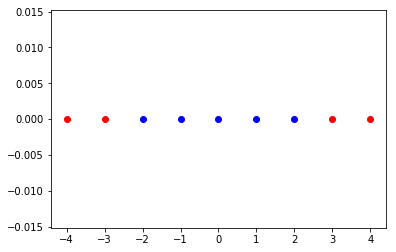

In [8]:
plt.scatter(x[y==0],[0]*len(x[y==0]),color="red")
plt.scatter(x[y==1],[0]*len(x[y==1]),color="blue")
plt.show()

In [9]:
def gaussian(x, l):  ## 将一维数组转变为二维
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [21]:
l1, l2 = -1, 1
x_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    x_new[i, 0] = gaussian(data, l1)
    x_new[i, 1] = gaussian(data, l2)

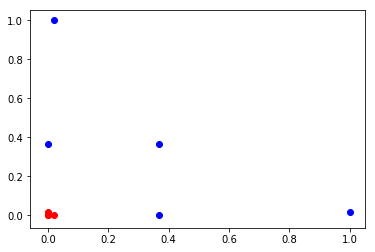

In [22]:
plt.scatter(x_new[y==0,0],x_new[y==0,1],color="red")
plt.scatter(x_new[y==1,0],x_new[y==1,1],color="blue")
plt.show()

# scikit-learn中的高斯核函数

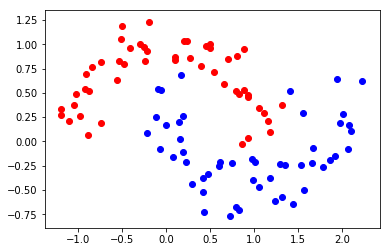

In [23]:
from sklearn import datasets
x, y = datasets.make_moons(noise=0.15, random_state=666) ##自动生成数据集
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
       # ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('SVC',SVC(kernel='rbf',gamma=gamma))
    ]
    )

In [32]:

svc = RBFKernelSVC(gamma=1.0)
svc.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [33]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)) ,
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


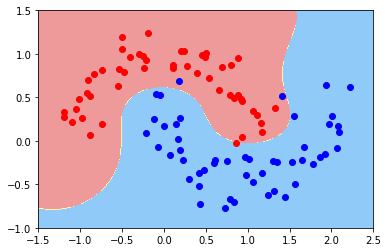

In [35]:

plot_decision_boundary(svc,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


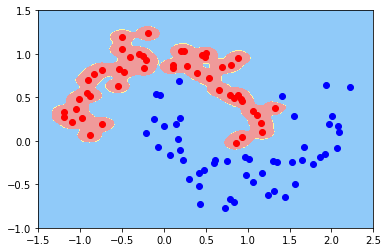

In [36]:
# 查看gramma对结果的影响 先取100
svc_gramma100 = RBFKernelSVC(gamma=100)
svc_gramma100.fit(x,y)

plot_decision_boundary(svc_gramma100,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


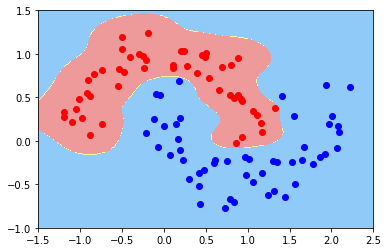

In [37]:
# 查看gramma对结果的影响 再取10
svc_gramma10 = RBFKernelSVC(gamma=10)
svc_gramma10.fit(x,y)

plot_decision_boundary(svc_gramma10,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


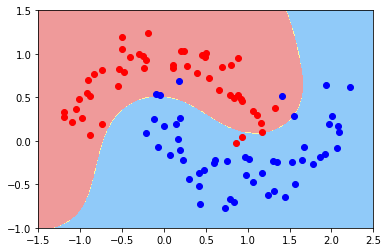

In [38]:
# 查看gramma对结果的影响 再取0.5
svc_gramma05 = RBFKernelSVC(gamma=0.5)
svc_gramma05.fit(x,y)

plot_decision_boundary(svc_gramma05,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


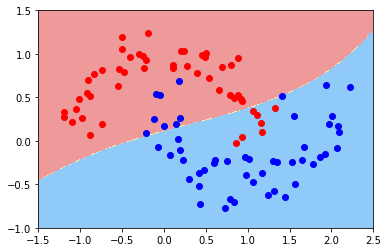

In [39]:
# 查看gramma对结果的影响 再取0.1
svc_gramma01 = RBFKernelSVC(gamma=0.1)
svc_gramma01.fit(x,y)

plot_decision_boundary(svc_gramma01,axis = (-1.5,2.5,-1.0,1.5))
plt.scatter(x[y==0,0],x[y==0,1],color="red")
plt.scatter(x[y==1,0],x[y==1,1],color="blue")
plt.show()